
## Admissions predict data set

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

    1. GRE Scores ( 290 of 340 ) 
    2. TOEFL Scores ( 92 of 120 ) 
    3. University Rating ( 1 of 5 )
    4. Statement of Purpose ( 1 of 5 )  
    5. Letter of Recommendation Strength ( 1 of 5 ) 
    6. Undergraduate GPA ( 6.8 of 10 ) 
    7. Research Experience ( 0 or 1 ) 
    8. Chance of Admit ( ranging from  0.34 to 0.97)
    

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [4]:
Data = pd.read_csv('Admission_Predict.csv')

In [5]:
Data.head(10)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
Data.shape

(400, 9)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
Data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Qualitative variable: In this data set University rating, Research are categorical attributes
## Quantitative variable: In this data GRE Score, TOFEL Score, LOR, SOP and Chance of admit are discrete and continuous attributes.


## Descriptive Statisctics

In [9]:
Data.mean()

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [10]:
Data.median()

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

In [11]:
Data['GRE Score'].mode()

0    312
1    324
dtype: int64

## We can observe that mean and median values of all the attributes is almost equal, which means data is not skewed

In [12]:
Data.quantile(q=0.25)

Serial No.           100.75
GRE Score            308.00
TOEFL Score          103.00
University Rating      2.00
SOP                    2.50
LOR                    3.00
CGPA                   8.17
Research               0.00
Chance of Admit        0.64
Name: 0.25, dtype: float64

In [13]:
Data.quantile(q=0.5)

Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
Name: 0.5, dtype: float64

In [14]:
Data.quantile(q=0.75)

Serial No.           300.2500
GRE Score            325.0000
TOEFL Score          112.0000
University Rating      4.0000
SOP                    4.0000
LOR                    4.0000
CGPA                   9.0625
Research               1.0000
Chance of Admit        0.8300
Name: 0.75, dtype: float64

## This gives the data below different quantiles

## Plot a histogram for the mean, median and mode of the GRE score attribute

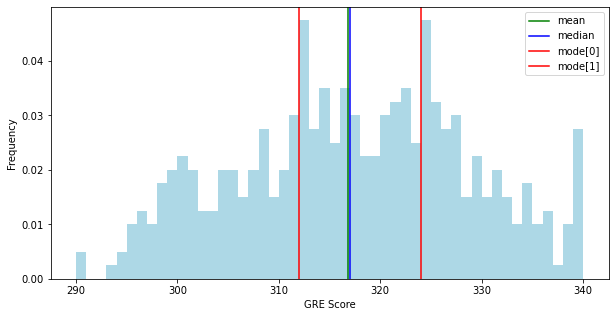

In [15]:
mean = Data['GRE Score'].mean()
median = Data['GRE Score'].median()
mode = Data['GRE Score'].mode()

plt.figure(figsize =(10,5))## sets the figure size
plt.hist(Data['GRE Score'],bins = 50, color ='lightblue',density='TRUE' )

plt.axvline(mean,color='green', label='mean')
plt.axvline(median,color='blue', label='median')
plt.axvline(mode[0],color='red', label='mode[0]')
plt.axvline(mode[1],color='red', label='mode[1]')
plt.xlabel('GRE Score')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

### Here number of bins is 50 that means in the histogram we are representing data in these 50 bins, The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 
### To get the width of the bin we do Max value- min value / number of bins
### Here the max value is 340 and mbin value is 240 so 340-240 / 50 = 1, so the width of each bin is 1
### Here mean and median are almost equal which means data is normally distributed


##  5 point summary of the data

In [16]:
Data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## understanding boxplot

In [17]:
## IQR
Data["TOEFL Score"].quantile(0.75) - Data["TOEFL Score"].quantile(0.25)

9.0

Text(0.7, 107.5, 'IQR')

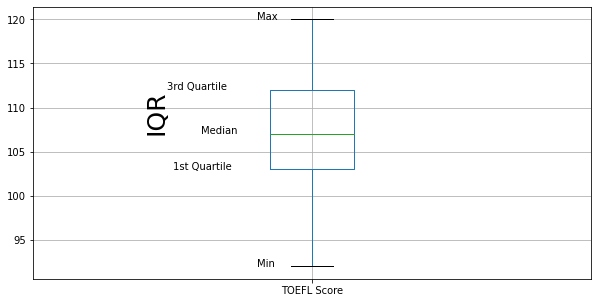

In [18]:
Data.boxplot(column="TOEFL Score", return_type='axes', figsize =(10,5))
plt.text(x=0.74,y=112.00, s="3rd Quartile")
plt.text(x=0.8, y=107.00, s="Median")
plt.text(x=0.75, y=103.00, s="1st Quartile")
plt.text(x=0.9, y=92.00, s="Min")
plt.text(x=0.9, y=120.00, s="Max")
plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

### we can observe from above graph that there are no extreme values / outliers in the data was equally distributed.

## Checking the measures of dispersion

### IQR

In [19]:
Data.quantile(0.75)-Data.quantile(0.25)

Serial No.           199.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.8925
Research               1.0000
Chance of Admit        0.1900
dtype: float64

### Range

In [21]:
print(Data.max()-Data.min())

Serial No.           399.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
Chance of Admit        0.63
dtype: float64


### Variance

In [22]:
print(Data.var())

Serial No.           13366.666667
GRE Score              131.644555
TOEFL Score             36.838997
University Rating        1.308114
SOP                      1.013784
LOR                      0.807262
CGPA                     0.355594
Research                 0.248365
Chance of Admit          0.020337
dtype: float64


### the above output says how much was the data dispersion.

### Standard Deviation

In [23]:
Data.std()

Serial No.           115.614301
GRE Score             11.473646
TOEFL Score            6.069514
University Rating      1.143728
SOP                    1.006869
LOR                    0.898478
CGPA                   0.596317
Research               0.498362
Chance of Admit        0.142609
dtype: float64

### The above output says how much is data deviated from the mean

### Correlation between attributes

In [24]:
Data.corr()  # prints the correlation coefficient between every pair of attributes

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### Pairplot for checking coorelation

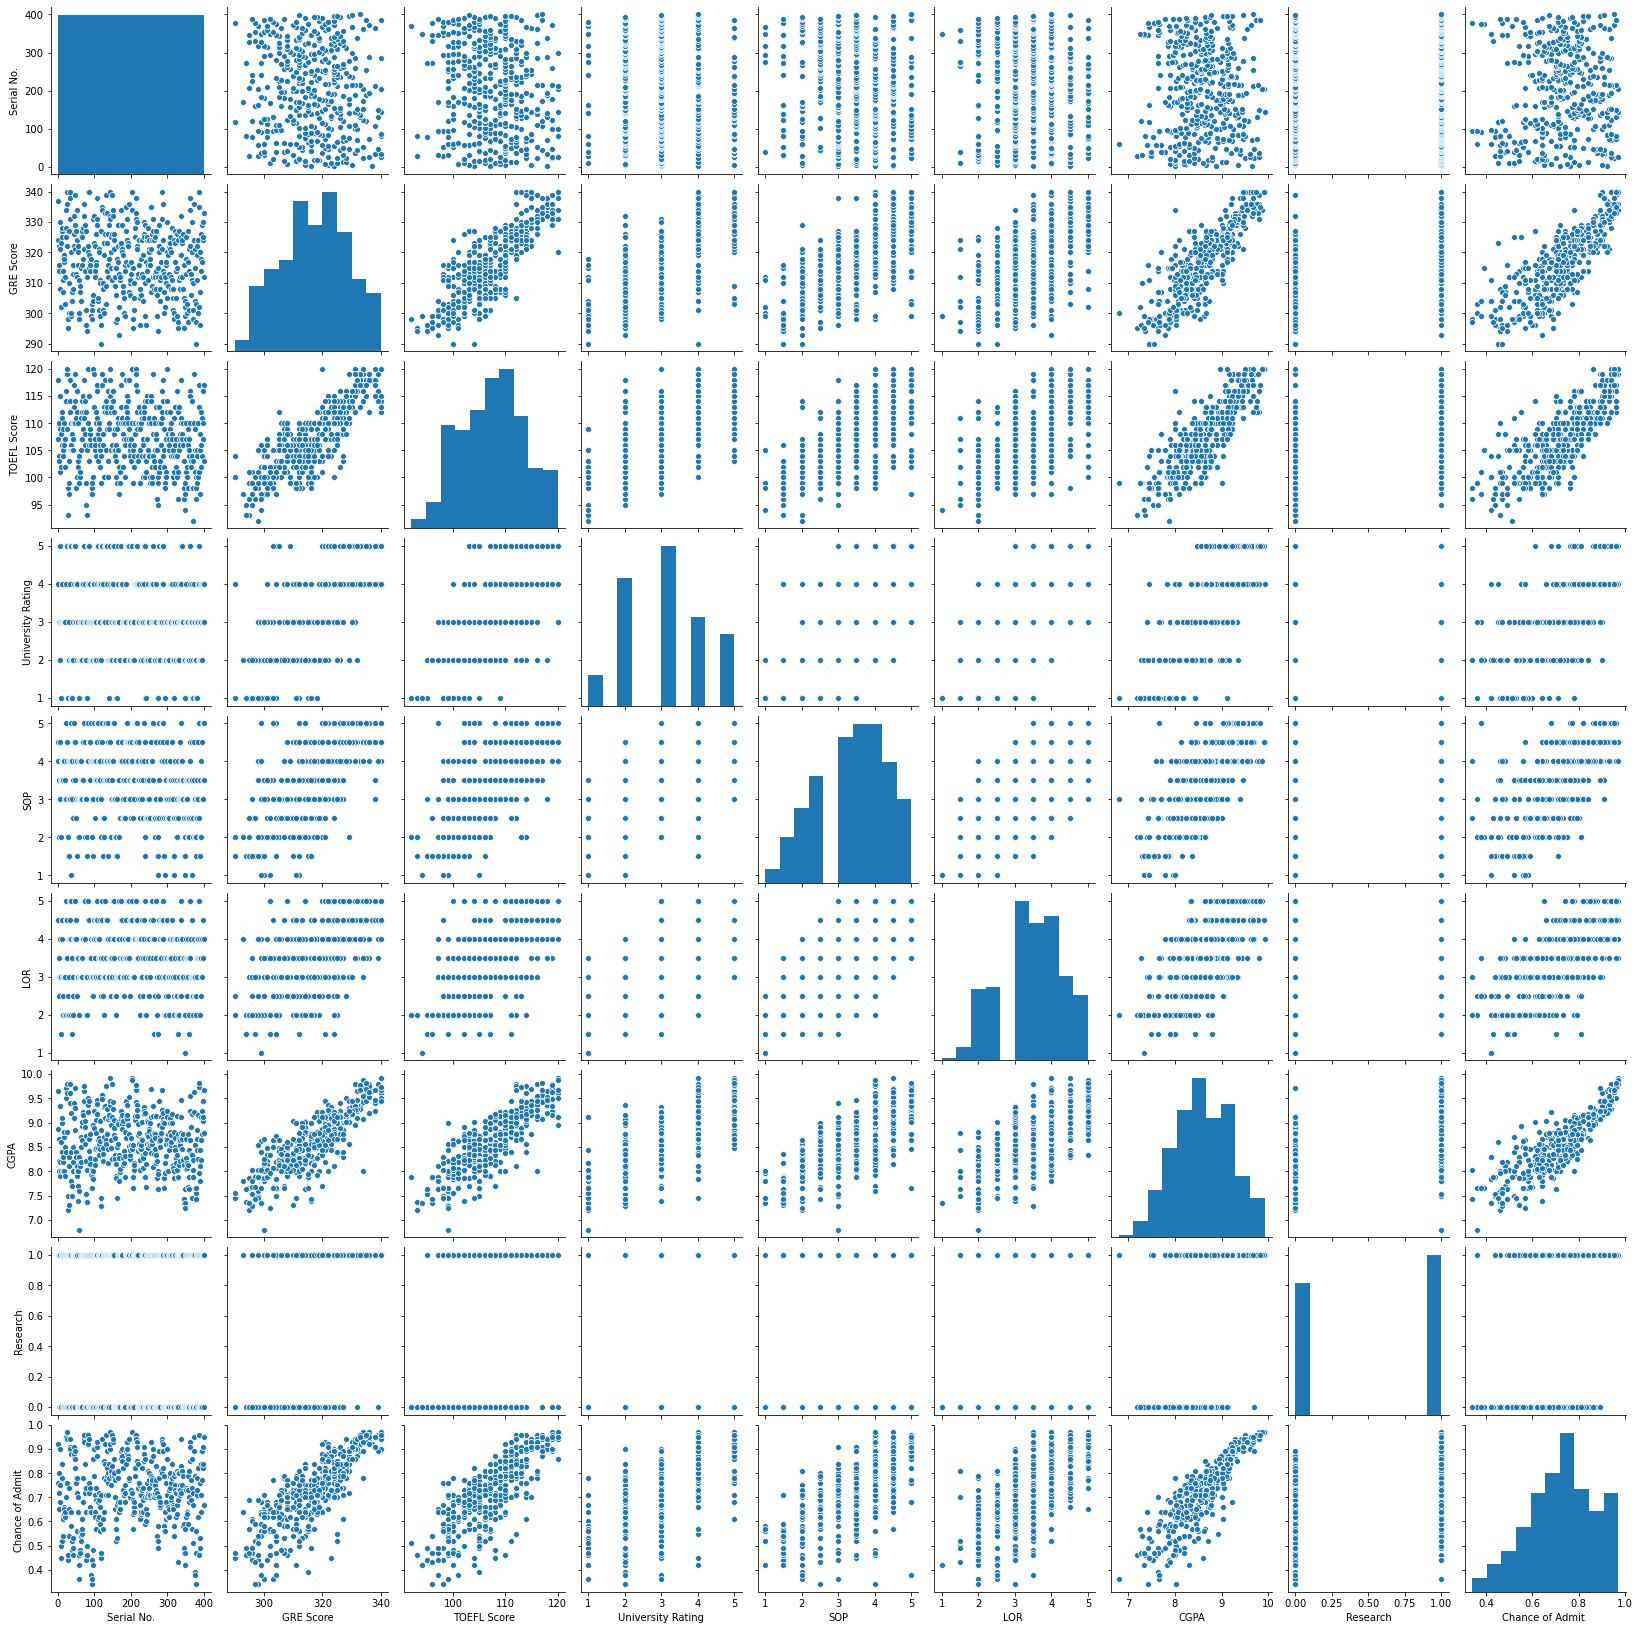

In [25]:
sns.pairplot(Data)

* Here we can see that TOEFL, GRE and CGPA Scores highly correlate with the chance of admission
* All of the attributes have good correlation with the chance of admission
* Apart from the target variable, there is fair amount of correlation amongst the other variables


### Heatmap for checking the coorelation

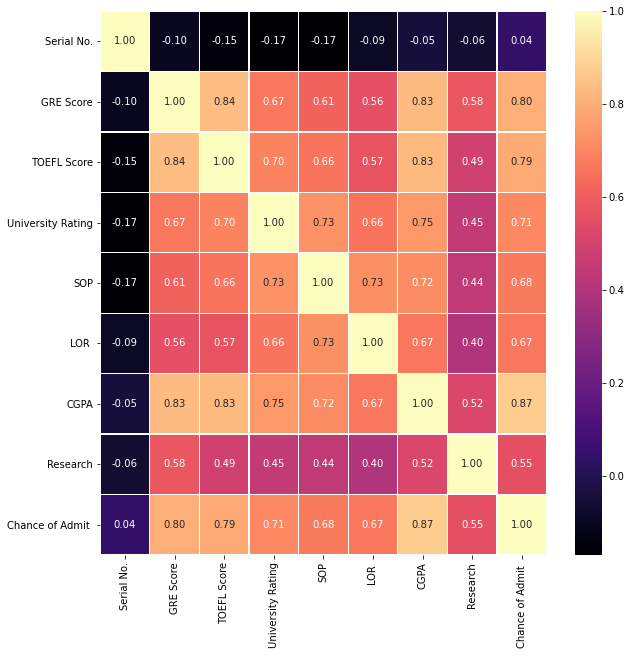

In [28]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(Data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### here we can see GRE, TOEFL and CGPA are all highly correlated with chance of admit as the correlation is almost 0.8
### University rating is also highly correlated with Chance of admit as mostly highly scoring students are admitted in univeristies
### LOR and SOP are not closely correlated

### we can confirm that TOEFL Score has highest postive co-relation with all the attributes.


## Skweness of data

In [29]:
Data.skew()

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

### Here we can see that GRE score, SOP, LOR,  CGPA, Research and chance of admit are all negatively correlated i.e mode > median > mean 

### Histogram for checking the skewness of one of the variable

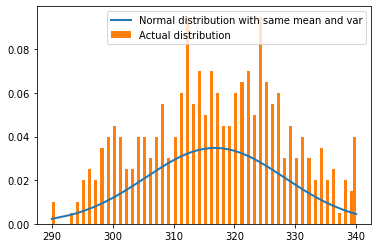

In [38]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['GRE Score'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density = True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

### * We can see int the above graph that it is negative skewed with skewness score -0.06 and also has Negative kurtosis(k=-0.70)